# Group Members:
## Full Name, Login Name, Student ID
### Lingxiao Li, lingxiao1, 1031146
### Hester Tze Hung Lim, HESTERTZEHUN, 1044793


In [1]:
# Import Libaries
import pandas as pd
import numpy as np
import textdistance
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict as df
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing, neighbors, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mutual_info_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib.colors import ListedColormap
from statistics import mean, median
import itertools

In [2]:
# read amazon_small.csv
df_amazon_small = pd.read_csv('amazon_small.csv')
df_amazon_small.head()

,idAmazon,title,description,manufacturer,price
0,b0002itt84,rise of nations: gold (mac),rise of nations combines the thrills and speed...,macsoft,49.99
1,b000pgvk5s,apple final cut studio 2 (mac),final cut studio 2 delivers an integrated post...,apple,1299.00
2,b0001wn0m2,microsoft office 2004 standard (mac),office 2004 standard is designed to be a total...,microsoft,399.99
3,b00004t2un,sales skills 2.0 ages 10+,real video saltware aquarium on your desktop!p...,victory multimedia,19.95
4,b000ov0gao,hollywood volume 1,contains the following songs: 1. arthur's them...,yamaha,31.95


In [3]:
# read google_small.csv
df_google_small = pd.read_csv('google_small.csv')
df_google_small.head()

,idGoogleBase,name,description,manufacturer,price
0,http://www.google.com/base/feeds/snippets/1329...,encore software 10599 - encore registry mechan...,encore software 10599 : pc tools registry mech...,NaN,25.97
1,http://www.google.com/base/feeds/snippets/1693...,adobe indesign cs3 for mac upgrade from pagemaker,system requirements powerpc g4 or g5 or intel ...,NaN,205.99
2,http://www.google.com/base/feeds/snippets/4998...,encore software 10568 - encore hoyle puzzle & ...,encore software 10568 : with old classics and ...,NaN,17.97
3,http://www.google.com/base/feeds/snippets/1695...,school zone interactive multiplication & divis...,multiplication & division introduces mutliplic...,NaN,9.45
4,http://www.google.com/base/feeds/snippets/1574...,apple software m9953z/a remote desktop 2.2 10 ...,the 10-client version allows one administrator...,apple software,294.99


In [4]:
# rename the name of df_google_small to title for easy merging later
df_google_small.rename(columns = {'name' : 'title'}, inplace = True)
df_google_small.head()

,idGoogleBase,title,description,manufacturer,price
0,http://www.google.com/base/feeds/snippets/1329...,encore software 10599 - encore registry mechan...,encore software 10599 : pc tools registry mech...,NaN,25.97
1,http://www.google.com/base/feeds/snippets/1693...,adobe indesign cs3 for mac upgrade from pagemaker,system requirements powerpc g4 or g5 or intel ...,NaN,205.99
2,http://www.google.com/base/feeds/snippets/4998...,encore software 10568 - encore hoyle puzzle & ...,encore software 10568 : with old classics and ...,NaN,17.97
3,http://www.google.com/base/feeds/snippets/1695...,school zone interactive multiplication & divis...,multiplication & division introduces mutliplic...,NaN,9.45
4,http://www.google.com/base/feeds/snippets/1574...,apple software m9953z/a remote desktop 2.2 10 ...,the 10-client version allows one administrator...,apple software,294.99


In [5]:
# read amazon_google_truth_small.csv
df_amazon_google_truth = pd.read_csv('amazon_google_truth_small.csv')
df_amazon_google_truth.head()

,idAmazon,idGoogleBase
0,b000hcz8ey,http://www.google.com/base/feeds/snippets/1111...
1,b00007e8d4,http://www.google.com/base/feeds/snippets/1695...
2,b000bb7fjw,http://www.google.com/base/feeds/snippets/1761...
3,b000gcbov6,http://www.google.com/base/feeds/snippets/7798...
4,b000bcz8ng,http://www.google.com/base/feeds/snippets/3077...


## Na ̈ıve data linkage without blocking (4 marks)

For this part, data linkage without blocking is performed on two smaller data sets: amazon small.csv and google small.csv.



The Tasks: Using amazon small.csv and google small.csv, implement the linkage be- tween the two data sets and measure its performance. Comment on your choice of similarity functions, method of deriving a final score, and the threshold for determining if a pair is a match.

The performance is evaluated in terms of recall and precision. Ground truth (true matches) are given in amazon google truth small.csv.

where tp (true-positive) is the number of true positive pairs, fp the number of false posi- tive pairs, tn the number of true negatives, and fn the number of false negative pairs. The four numbers should sum up to the total number of all possible pairs from the two datasets. (n = fp + fn + tp + tn)

In [6]:
#read the ground truth and store it in a dict
df_amazon_google_truth.set_index('idAmazon',inplace=True)
truth_dict = df(list)
i = 0
for idAmazon in df_amazon_google_truth.index.tolist():
    truth_dict[idAmazon].append(df_amazon_google_truth.iloc[i,0])
    i += 1

In [7]:
# receive two strings and return the longest common substring similarity divided by the minimum length of the two strings
def common_substring_rate(str1,str2):
    return len(textdistance.lcsstr(str1,str2))/min(len(str1),len(str2))

# our similarity function, return the score for that row
def similarity():
    score = common_substring_rate(google_row.title,amazon_row.title)
    return score

# create a dataframe which store the similarity score
score_dict = {}
for i in range(df_amazon_small.shape[0]):
    #got the amazon row
    amazon_row = df_amazon_small.iloc[i]
    score_row = []
    for j in range(df_google_small.shape[0]):
        #got the google row
        google_row = df_google_small.iloc[j]
        max_score = similarity()
        score_row.append(max_score)
    #store it in the dict
    score_dict[amazon_row.idAmazon] = score_row
#change dict into dataframe
df_score = pd.DataFrame(score_dict)
idGoogleBase_list = df_google_small.idGoogleBase.tolist()
df_score['idGoogleBase'] = idGoogleBase_list
df_score.set_index('idGoogleBase',inplace=True)

In [8]:
# show the similarity dataframe we compute
df_score.head()

,b0002itt84,b000pgvk5s,b0001wn0m2,b00004t2un,b000ov0gao,b000fdetxq,b0001y7poo,b000nvkyse,b000h13a2w,b0009jhv1s,...,b000h774k0,b0002yiuns,b000cditbc,b0009yegcu,b000067fk7,b000exw51k,b0007wv3ei,b000h69szu,b000ndib8m,b000qfrt4o
idGoogleBase,,,,,,,,,,,,,,,,,,,,,
http://www.google.com/base/feeds/snippets/13298644336068097806,0.074074,0.100000,0.277778,0.12,0.166667,0.090909,0.050,0.056604,0.300000,0.2,...,0.111111,0.103448,0.105263,0.133333,0.108108,0.473684,0.108108,0.125000,0.111111,0.102564
http://www.google.com/base/feeds/snippets/16934204320953872944,0.111111,0.100000,0.083333,0.12,0.111111,0.068182,0.050,0.061224,0.040816,0.2,...,0.083333,0.103448,0.157895,0.233333,0.189189,0.052632,0.108108,0.083333,0.259259,0.179487
http://www.google.com/base/feeds/snippets/4998847858583359731,0.074074,0.100000,0.277778,0.12,0.166667,0.068182,0.050,0.075472,0.300000,0.2,...,0.111111,0.103448,0.210526,0.133333,0.108108,0.078947,0.108108,0.083333,0.074074,0.102564
http://www.google.com/base/feeds/snippets/16959392076941739015,0.185185,0.066667,0.111111,0.08,0.111111,0.045455,0.075,0.056604,0.180000,0.4,...,0.083333,0.103448,0.157895,0.066667,0.108108,0.052632,0.108108,0.125000,0.111111,0.102564
http://www.google.com/base/feeds/snippets/15744420000863688597,0.074074,0.200000,0.111111,0.12,0.111111,0.363636,0.050,0.057692,0.200000,0.2,...,0.083333,0.137931,0.157895,0.133333,0.135135,0.078947,0.054054,0.083333,0.074074,0.128205


In [9]:
def maxpair():
    """a preprocessing before compute the best threshold and result
    by compute the max similarity score for idAmazon and idGoogleBase and store them into two dictionaries"""
    df_scoreT = df_score.T
    max_pair_dict = df(list)
    max_pair_dictT = df(list)
    for index_local in df_score.index.tolist():
        idAmazon_local = df_score.loc[index_local,:].idxmax()
        max_value = df_score.loc[index_local,idAmazon_local]
        max_pair_dict[index_local] = (idAmazon_local,max_value)
    
    for idAmazon_local in df_scoreT.index.tolist():
        idGoogleBase_local = df_scoreT.loc[idAmazon_local,:].idxmax()
        max_value = df_score.loc[idGoogleBase_local,idAmazon_local]
        max_pair_dictT[idAmazon_local] = (idGoogleBase_local,max_value)
        
    return max_pair_dict , max_pair_dictT
    
def recall_precision(threshold, threshoudT, max_pair_dict, max_pair_dictT):
    """A function which receive two threshold to compute the recall, precision and F1 score, 
    it compute the match dict(variable: combine_pair) as well"""
    #transpose our data
    df_scoreT = df_score.T
    ourpair_dictT = df(list)
    ourpair_dict = df(list)
     
    """Here we compute two kinds of match to achieve that one idAmazon could match several idGoogleBase
    and one idGoogleBase could match several idAmazon"""
    # match idGoogleBase to idAmazon which contains highest score and 
    # if the highest score is greater than threshold, the match is success
    for index_local in df_score.index.tolist():
        idAmazon_local = max_pair_dict[index_local][0]
        if (max_pair_dict[index_local][1]>=threshold):
            ourpair_dict[idAmazon_local].append(index_local)
    
    # match idAmazon to idGoogleBase which contains highest score and 
    # if the highest score is greater than thresholdT, the match is success        
    for idAmazon_local in df_scoreT.index.tolist():
        idGoogleBase_local = max_pair_dictT[idAmazon_local][0]
        if (max_pair_dictT[idAmazon_local][1]>=threshoudT):
            ourpair_dictT[idAmazon_local].append(idGoogleBase_local)
    
    # combine the two match.
    combine_pair = df(list)
    keys = list(set(list(ourpair_dictT.keys()) + list(ourpair_dict.keys())))
    for key in keys:
        if (key in ourpair_dictT.keys() and (key in ourpair_dict.keys())):
            combine_pair[key]=list(set(ourpair_dictT[key] + ourpair_dict[key]))
        elif (key in ourpair_dictT.keys()):
            combine_pair[key]=list(set(ourpair_dictT[key]))
        else:
            combine_pair[key]=list(set(ourpair_dict[key]))
    
    # compute the tp,tn,fp,fn to find recall, precision and F1 score
    tp, tn, fp, fn= 0, 0, 0, 0
    recall, precision, F1 = 0, 0, 0
    # the dict pair we use
    final_pair = combine_pair
    # we compute tp,tn,fp,fn here
    keys = df_score.T.index.tolist()
    for key in keys:
        if key in final_pair.keys() and key in truth_dict.keys():
            for idGoogleBase in final_pair[key]:
                if idGoogleBase in truth_dict[key]:
                    # here our pair is the same as ground truth
                    tp += 1
                else:
                    # here our pair says positive, but the ground truth says false
                    fp += 1
        elif key in final_pair.keys():
            # here our pair says positive, but it doesn't exist in ground truth
            fp += len(final_pair[key])
        elif key in truth_dict.keys():
            # here our pair does not exist that key, but the ground truth say it exist
            fn += len(truth_dict[key])
        else:
            # both says not exist
            tn += 1
    # compute the recall, precision and F1 score
    if (tp + fn) != 0:
        recall = tp/(tp + fn)
    if (tp + fp) != 0 :
        precision = tp/(tp + fp)
    if (precision + recall) != 0:
        F1 = 2 * precision * recall / (precision + recall)
    
    # return
    return recall,precision,F1

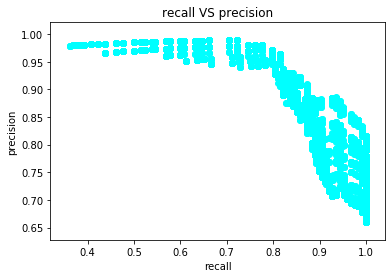

/***********************************************************/
optimum_threshold:
For choosing pairs using idGoogleBase as key: 0.62
For choosing pairs using idAmazon as key:     0.39
results:
Recall:     0.9435483870967742
Precision:  0.8796992481203008
F1 score:   0.9105058365758755
/***********************************************************/


In [10]:
#the list to store the recall and precision for each pair of threshold
recall_list = []
precision_list = []

# key is F1 score, value is the pair of thershold achieve that F1 score
F1 = {}

# compute the max_pair for both idGoogleBase as index and idAmazon as index
max_pair_dict , max_pair_dictT = maxpair()

# compute all the possible of threshold
for threshold in np.arange(0,1,0.01):
    for thresholdT in np.arange(0,1,0.01):
        rp = recall_precision(threshold,thresholdT,max_pair_dict,max_pair_dictT)
        recall_list.append(rp[0])
        precision_list.append(rp[1])
        F1[rp[2]] = (threshold,thresholdT)

# use a scatter to show all the recall and precison pair
plt.scatter(recall_list,precision_list,color='aqua')
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("recall VS precision")
plt.show()

# find the optimum threshold and print it
optimum_threshold = F1[max(F1.keys())]
result = recall_precision(optimum_threshold[0],optimum_threshold[1],max_pair_dict,max_pair_dictT)
print('/***********************************************************/')
print('optimum_threshold:')
print(f'For choosing pairs using idGoogleBase as key: {optimum_threshold[0]}')
print(f'For choosing pairs using idAmazon as key:     {optimum_threshold[1]}')
print('results:')
print(f'Recall:     {result[0]}')
print(f'Precision:  {result[1]}')
print(f'F1 score:   {result[2]}')
print('/***********************************************************/')

# A discussion on the linkage method and its performance. (1 mark)
We use our own similarity function based on the pattern that we observed. We use the length of the longest common substring similarity in title divided by the minimum length of the two title. We use this because we observe that the titles of match pair are quiet similar. Mostly, we could observe one title by minus some words in its matched title.For example, we observe a title 'Apple mac 2017', and the title it matches with is 'mac 2017'.

And this linkage method performes pretty well. It achieves a much higher recall and precision than we use jaccard similarity and Jaro-Winkler similarity.

And we use F1 score(also known as Sørensen–Dice coefficient) to deriving a final score. And we compare the final score to find the best performing threshold.

----------------------------------------------------------------------------------------------------
# Blocking for efficient data linkage (3 marks)

Blocking is a method to reduce the computational cost for record linkage.

The Tasks: Implement a blocking method for the linkage of the amazon.csv and google.csv
data sets and report on your proposed method and the quality of the results of the blocking.
Ground truths are given in amazon google truth.csv.

In [11]:
# read amazon.csv
df_amazon = pd.read_csv('amazon.csv')
df_amazon.head()

,idAmazon,title,description,manufacturer,price
0,b000jz4hqo,clickart 950 000 - premier image pack (dvd-rom),NaN,broderbund,0.00
1,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,computer associates,0.00
2,b00004tkvy,noah's ark activity center (jewel case ages 3-8),NaN,victory multimedia,0.00
3,b000g80lqo,peachtree by sage premium accounting for nonpr...,peachtree premium accounting for nonprofits 20...,sage software,599.99
4,b0006se5bq,singing coach unlimited,singing coach unlimited - electronic learning ...,carry-a-tune technologies,99.99


In [12]:
# read google_small.csv
df_google = pd.read_csv('google.csv')
# remove alpha in price so we can change the type of price to float64
def remove_alpha(price):
    result = ''
    for char in price:
        if not char.isalpha():
            result += char
    return result
df_google.price = df_google.price.map(remove_alpha)
df_google.price = df_google.price.astype('float64')
df_google.head()

,id,name,description,manufacturer,price
0,http://www.google.com/base/feeds/snippets/1112...,learning quickbooks 2007,learning quickbooks 2007,intuit,38.99
1,http://www.google.com/base/feeds/snippets/1153...,superstart! fun with reading & writing!,fun with reading & writing! is designed to hel...,NaN,8.49
2,http://www.google.com/base/feeds/snippets/1134...,qb pos 6.0 basic software,qb pos 6.0 basic retail mngmt software. for re...,intuit,637.99
3,http://www.google.com/base/feeds/snippets/1204...,math missions: the amazing arcade adventure (g...,save spectacle city by disrupting randall unde...,NaN,12.95
4,http://www.google.com/base/feeds/snippets/1224...,production prem cs3 mac upgrad,adobe cs3 production premium mac upgrade from ...,adobe software,805.99


In [13]:
# rename the name of df_google to title for easy merging later
# rename the id to idGoogleBase
df_google.rename(columns = {'name' : 'title'}, inplace = True)
df_google.rename(columns = {'id' : 'idGoogleBase'}, inplace = True)
df_google.head()

,idGoogleBase,title,description,manufacturer,price
0,http://www.google.com/base/feeds/snippets/1112...,learning quickbooks 2007,learning quickbooks 2007,intuit,38.99
1,http://www.google.com/base/feeds/snippets/1153...,superstart! fun with reading & writing!,fun with reading & writing! is designed to hel...,NaN,8.49
2,http://www.google.com/base/feeds/snippets/1134...,qb pos 6.0 basic software,qb pos 6.0 basic retail mngmt software. for re...,intuit,637.99
3,http://www.google.com/base/feeds/snippets/1204...,math missions: the amazing arcade adventure (g...,save spectacle city by disrupting randall unde...,NaN,12.95
4,http://www.google.com/base/feeds/snippets/1224...,production prem cs3 mac upgrad,adobe cs3 production premium mac upgrade from ...,adobe software,805.99


In [14]:
# read amazon_google_truth.csv
df_amazon_google = pd.read_csv('amazon_google_truth.csv')
df_amazon_google.head()

,idAmazon,idGoogleBase
0,b000jz4hqo,http://www.google.com/base/feeds/snippets/1844...
1,b00004tkvy,http://www.google.com/base/feeds/snippets/1844...
2,b000g80lqo,http://www.google.com/base/feeds/snippets/1844...
3,b0006se5bq,http://www.google.com/base/feeds/snippets/1842...
4,b00021xhzw,http://www.google.com/base/feeds/snippets/1843...


In [15]:
# we match the manufacturer if their first word is same
pair_list = []
for company in df_amazon.manufacturer.unique().tolist():
    exist = False
    for i in range(len(pair_list)):
        if company.split()[0] == (pair_list[i][0]).split()[0]:
            pair_list[i].append(company)
            exist = True
            break
    if(not exist):
        pair_list.append([company])

# change the match list to dict in order to change the manufacturer in dataframe
pair_dict = {}
for companys in pair_list:
    min_len_name = sorted(companys,key=lambda x:len(x))[0]
    for company in companys:
        pair_dict[company] = min_len_name

# change the manufacturer in dataframe by pair dict to shrink the number of blocks
df_amazon.manufacturer = df_amazon.manufacturer.map(pair_dict)

# blocking for amazon
manufacturer_dict = df(list)
for group in df_amazon.groupby('manufacturer'):
    manufacturer_dict[group[0]].append(group[1].idAmazon.tolist())
for company in manufacturer_dict:
    manufacturer_dict[company].append([])



In [16]:
"""Blocking for google, if we could find the manufacturer name in manufacturer column, that row is belong to that block.
if we can not find that manufacturer name, we continue to seek the manufacturer name in description column then to title column
to avoid missing values"""
for company in manufacturer_dict.keys():
    for i in range(df_google.shape[0]):
        google_row = df_google.iloc[i]
        # if not nan, we could compair 
        if (not type(google_row.manufacturer) == float) and (company in google_row.manufacturer):
                manufacturer_dict[company][1].append(google_row.idGoogleBase)
        elif (not type(google_row.description) == float) and (company in google_row.description):
                manufacturer_dict[company][1].append(google_row.idGoogleBase)
        else:
            if company in google_row.title:
                manufacturer_dict[company][1].append(google_row.idGoogleBase)

In [17]:
# key is the id , and value is the company that id belong to 
amazon_dict = {}
google_dict = {}

for company in manufacturer_dict.keys():
    for idAmazon in manufacturer_dict[company][0]:
        amazon_dict[idAmazon] = company
    for idGoogleBase in manufacturer_dict[company][1]:
        google_dict[idGoogleBase] = company

In [18]:
tp, tn, fp, fn = 0, 0, 0, 0
# fn the key could not found in Amazon or google
fna, fng = 0, 0
for i in range(df_amazon_google.shape[0]):
    pair_truth = df_amazon_google.iloc[i]
    if (pair_truth.idAmazon in amazon_dict.keys()) and (pair_truth.idGoogleBase in google_dict.keys()):
        if amazon_dict[pair_truth.idAmazon] == google_dict[pair_truth.idGoogleBase]:
            # the pair is found in the ground truth set and also the pair are in the same block
            tp += 1
        else:
            # the pair co-occur in some block but are not found in the ground truth set
            fn += 1
    else:
        # the pair co-occur in some block but are not found in the ground truth set
        fn += 1
        if(not pair_truth.idAmazon in amazon_dict.keys()):
            fna += 1
        if(not pair_truth.idGoogleBase in google_dict.keys()):
            fng += 1

# compute PC        
PC = tp/(tp+fn)

In [19]:
# sum of tp and fp is the number of all possible pairs in our blocks
sum_tp_fp = 0
for pairs in manufacturer_dict.values():
    sum_tp_fp += len(pairs[0]) * len(pairs[1])

# n is the number of all possible pairs in original data
# compute RR
RR = 1-sum_tp_fp/(df_amazon.shape[0]*df_google.shape[0])

In [20]:
# show the result
print('/***********************************************************/')
print('results:')
print(f'Pair completeness (PC):      {PC}')
print(f'Reduction ratio (RR):        {RR}')
print('/***********************************************************/')

/***********************************************************/
results:
Pair completeness (PC):      0.6084615384615385
Reduction ratio (RR):        0.9817533985378338
/***********************************************************/


# A discussion on the blocking method and its quality.
We block the data base on the manufacturer name. If the data dont have a manufacturer name, we seek its manufacturer name from the description column and title column. Also, to shrink the block number, we combine the manufacturer name if their first word are the same.e.g 'sega' & 'sega entertainment' will become 'sega'.

The quality does not performe well on the pair completeness. This is basicly because of two reasons. One is that we mistakenly combined some manufacturers such as 'The learning company' and 'The computer company'. The other reason is that our algorithm for blocking the manufacturer name is quite strict.

# Part 2 - Classification (12 marks)

A biological sciences research team is interesting in prediciting the cellular localization sites of proteins in yeast, based on particular attributes. In particular, they wish to separate cytoplasm proteins (CYT) from other proteins (non-CYT). They have collected some (somewhat noisy) data from their current yeast samples. The dataset includes a Class column specifying whether a particular sample relates to a CYT or non-CYT protein, along with other features related to the sample. As data scientists, we wish to help them build and assess a classifier for performing this task.

# Impute missing values: 

Use replacement by mean and replacement by median to fill in missing values. Display the min, median, max, mean and standard deviation for the data with imputations. Justify which imputation method is more suitable.

In [21]:
# read the data and set index to Sample
data = pd.read_csv("all_yeast.csv") 
data.set_index('Sample',inplace=True)
data.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
Sample,,,,,,,,,
1,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,non-CYT
2,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,non-CYT
3,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,non-CYT
4,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,non-CYT
5,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,non-CYT


In [22]:
# show the number of missing values in each column
data.isnull().sum()

mcg      132
gvh       35
alm      114
mit      132
erl       39
pox        0
vac       92
nuc       77
Class      0
dtype: int64

In [23]:
# fill the missing values with mean of each column
data_mean = data.copy()
data_mean.fillna(data_mean.mean(), inplace=True)
data_mean.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
Sample,,,,,,,,,
1,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,non-CYT
2,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,non-CYT
3,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,non-CYT
4,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,non-CYT
5,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,non-CYT


In [24]:
# Display the min, median, max, mean and standard deviation for the data with imputation of mean
data_mean.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.499349,0.499876,0.505848,0.264379,0.506921,0.007500,0.503816,0.279816
std,0.131357,0.121945,0.199837,0.150286,0.091573,0.075683,0.153481,0.151736
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.499349,0.490000,0.510000,0.230000,0.500000,0.000000,0.510000,0.220000
75%,0.562500,0.570000,0.550000,0.300000,0.500000,0.000000,0.530000,0.290000
max,1.000000,1.000000,7.501819,3.000728,3.500849,0.830000,6.001456,4.501092


In [25]:
# fill the missing values with median of each column
data_median = data.copy()
data_median.fillna(data_median.median(), inplace=True)
data_median.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
Sample,,,,,,,,,
1,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,non-CYT
2,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,non-CYT
3,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,non-CYT
4,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,non-CYT
5,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,non-CYT


In [26]:
# Display the min, median, max, mean and standard deviation for the data with imputation of median
data_median.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.497628,0.499643,0.506167,0.260432,0.506739,0.007500,0.504199,0.276712
std,0.131472,0.121954,0.199840,0.150817,0.091580,0.075683,0.153488,0.152315
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.480000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.562500,0.570000,0.550000,0.300000,0.500000,0.000000,0.530000,0.290000
max,1.000000,1.000000,7.501819,3.000728,3.500849,0.830000,6.001456,4.501092


In [27]:
data.corr()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
mcg,1.000000,0.580127,-0.063045,0.117558,-0.025189,0.006436,0.040496,-0.089875
gvh,0.580127,1.000000,-0.125707,0.120051,-0.029663,0.000444,0.024721,-0.086890
alm,-0.063045,-0.125707,1.000000,-0.004185,0.020961,0.003424,-0.036669,-0.009518
mit,0.117558,0.120051,-0.004185,1.000000,-0.007087,-0.019257,-0.049534,-0.045789
erl,-0.025189,-0.029663,0.020961,-0.007087,1.000000,-0.007496,0.004895,-0.012520
pox,0.006436,0.000444,0.003424,-0.019257,-0.007496,1.000000,0.005333,-0.024596
vac,0.040496,0.024721,-0.036669,-0.049534,0.004895,0.005333,1.000000,-0.008196
nuc,-0.089875,-0.086890,-0.009518,-0.045789,-0.012520,-0.024596,-0.008196,1.000000


# Explain:
Median Substution is chosen because for Mean Substituition, we must make sure that the mean imputation attenuates any correlations involving the variables that are imputed.

With our datasets, we could see that each variables has a correlation with each variables making mean substituition not suitable.

# Scale the features: 
Explore the use of two transformation techniques (mean centering and standardisation) to scale all attributes after median imputation, and compare their effects. Display the min, median, max, mean and standard deviation for the both types of data scaling.

In [28]:
# only store the numerical columns
X_train = np.array(data_median.iloc[:,0:8])
X_attributename = [i for i in data][0:8]

In [29]:
# Scale the features with mean centering
X_scaled = preprocessing.scale(X_train, with_std=False)
df_meanc = pd.DataFrame(X_scaled,columns=X_attributename)
df_meanc.index = data.index

In [30]:
# Display the min, median, max, mean and standard deviation for the features with mean centering
df_meanc.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03
mean,7.432659e-17,-2.771817e-17,6.400241e-17,-5.311714e-18,3.112215e-17,2.783390e-17,-3.890269e-17,-1.347567e-16
std,1.314724e-01,1.219545e-01,1.998397e-01,1.508169e-01,9.157975e-02,7.568267e-02,1.534880e-01,1.523150e-01
min,-3.876280e-01,-3.696429e-01,-2.961670e-01,-2.604318e-01,-6.739117e-03,-7.500000e-03,-5.041991e-01,-2.767123e-01
25%,-8.762803e-02,-7.964286e-02,-4.616699e-02,-9.043176e-02,-6.739117e-03,-7.500000e-03,-2.419909e-02,-5.671233e-02
50%,-1.762803e-02,-9.642857e-03,3.833006e-03,-4.043176e-02,-6.739117e-03,-7.500000e-03,5.800906e-03,-5.671233e-02
75%,6.487197e-02,7.035714e-02,4.383301e-02,3.956824e-02,-6.739117e-03,-7.500000e-03,2.580091e-02,1.328767e-02
max,5.023720e-01,5.003571e-01,6.995652e+00,2.740296e+00,2.994110e+00,8.225000e-01,5.497256e+00,4.224379e+00


In [31]:
# Scale the features with standardisation
scaler = preprocessing.StandardScaler().fit(X_train)
X_std=scaler.transform(X_train)
df_std = pd.DataFrame(X_std,columns=X_attributename)
df_std.index = data.index

In [32]:
# Display the min, median, max, mean and standard deviation for the features with standardisation
df_std.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03
mean,5.850367e-16,-1.911469e-16,2.817827e-16,1.802990e-17,3.727738e-16,4.263399e-16,-1.979175e-16,-4.642139e-16
std,1.000337e+00,1.000337e+00,1.000337e+00,1.000337e+00,1.000337e+00,1.000337e+00,1.000337e+00,1.000337e+00
min,-2.949354e+00,-3.032012e+00,-1.482523e+00,-1.727390e+00,-7.361222e-02,-9.913140e-02,-3.286049e+00,-1.817324e+00
25%,-6.667373e-01,-6.532740e-01,-2.310980e-01,-5.998152e-01,-7.361222e-02,-9.913140e-02,-1.577143e-01,-3.724614e-01
50%,-1.341268e-01,-7.909596e-02,1.918687e-02,-2.681755e-01,-7.361222e-02,-9.913140e-02,3.780662e-02,-3.724614e-01
75%,4.935928e-01,5.771075e-01,2.194148e-01,2.624480e-01,-7.361222e-02,-9.913140e-02,1.681539e-01,8.726755e-02
max,3.822409e+00,4.104201e+00,3.501812e+01,1.817582e+01,3.270504e+01,1.087141e+01,3.582762e+01,2.774385e+01


# Mean Centering. 
For mean centering, we move the center of the data from somewhere else to 0 in a multi-dimension space, which is helpful to gain a meaningful interpretation of the estimated constant.

For standardisation, though it changes the mean to 0 as well, it changed the variance to 1 at the same time. But the variance is critical for Classification Algorithms. If we standardise it, the accuracy will decrease.

------------------------------------------------------------------------------------------
# Comparing Classification Algorithms (3 marks)



We wish to compare the performance of the following 3 classification algorithms: k-NN (k=5 and k=10) and Decision tree algorithms on the all yeast dataset.

Use the data, all yeast, as transformed in your pre-processing (mean centered, median imputed). Train the classifiers using 2/3 of the data and test the classifiers by applying them to the remaining 1/3 of the data. Use each classification algorithm to predict the Class feature of the data (CYT or non-CYT) using the first 8 features (mcg-nuc). 

What are the algorithms’ accuracies on the test data? Which algorithm performed best on this dataset? Explain your experiments and the results.

In [33]:
# seperate the date into training parts and testing parts
df_meanc['Class'] = data['Class']
X_train, X_test ,y_train, y_test= train_test_split(df_meanc.iloc[:,:8], df_meanc.iloc[:,8:], test_size=1/3, random_state=42)
df_meanc.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03,1.484000e+03
mean,7.432659e-17,-2.771817e-17,6.400241e-17,-5.311714e-18,3.112215e-17,2.783390e-17,-3.890269e-17,-1.347567e-16
std,1.314724e-01,1.219545e-01,1.998397e-01,1.508169e-01,9.157975e-02,7.568267e-02,1.534880e-01,1.523150e-01
min,-3.876280e-01,-3.696429e-01,-2.961670e-01,-2.604318e-01,-6.739117e-03,-7.500000e-03,-5.041991e-01,-2.767123e-01
25%,-8.762803e-02,-7.964286e-02,-4.616699e-02,-9.043176e-02,-6.739117e-03,-7.500000e-03,-2.419909e-02,-5.671233e-02
50%,-1.762803e-02,-9.642857e-03,3.833006e-03,-4.043176e-02,-6.739117e-03,-7.500000e-03,5.800906e-03,-5.671233e-02
75%,6.487197e-02,7.035714e-02,4.383301e-02,3.956824e-02,-6.739117e-03,-7.500000e-03,2.580091e-02,1.328767e-02
max,5.023720e-01,5.003571e-01,6.995652e+00,2.740296e+00,2.994110e+00,8.225000e-01,5.497256e+00,4.224379e+00


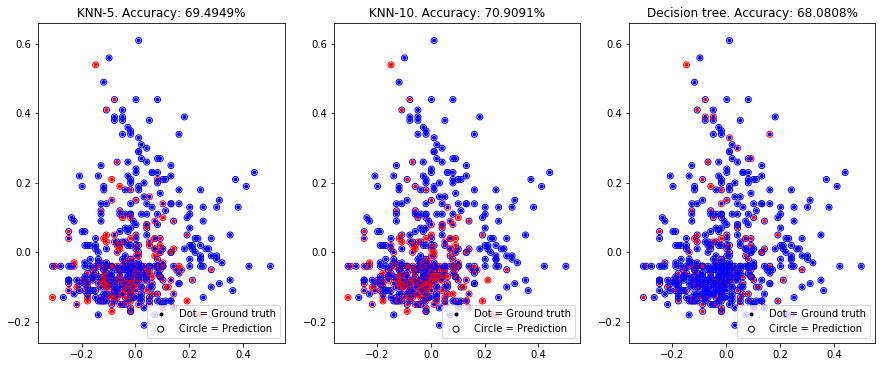

In [34]:
# draw the figure
fig = plt.figure(figsize=(15,20))

def run_model(model, alg_name, plot_index):
    """accept model, name of algorithm and plot index to draw a subplot which show the accuracy and the graph"""
    # build the model on training data
    model.fit(X_train, y_train.values.reshape(-1,))

    # make predictions for test data
    y_pred = model.predict(X_test)
    # calculate the accuracy score
    accuracy =  accuracy_score(y_test, y_pred) * 100

    # Compare the prediction result with ground truth
    color_code = {'CYT':'red', 'non-CYT':'blue'}

    # plt.figure(plot_index)
    ax = fig.add_subplot(3,3,plot_index) 
    colors = [color_code[x] for x in y_test.iloc[:,0]]
    ax.scatter(X_test.iloc[:,0], X_test.iloc[:,3], color=colors, marker='.', label='Dot = Ground truth')
    colors = [color_code[x] for x in y_pred]
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:,3], color=colors, marker='o', facecolors='none', label='Circle = Prediction')

    #plt.axes([0.65, 0.65, 0.2, 0.2])
    ax.legend(loc="lower right")
    # manually set legend color to black
    leg = plt.gca().get_legend()
    leg.legendHandles[0].set_color('black')
    leg.legendHandles[1].set_color('black')
    leg.legendHandles[1].set_facecolors('none')

    ax.set_title(alg_name + ". Accuracy: " + str(round(accuracy,4))+ "%")
    return accuracy/100

# draw the graph of KNN-5
model = neighbors.KNeighborsClassifier(n_neighbors=5)
accuracy_KNN5 = run_model(model, "KNN-5", 1)

# draw the graph of KNN-10
model = neighbors.KNeighborsClassifier(n_neighbors=10)
accuracy_KNN10 = run_model(model, "KNN-10", 2)

# draw the graph of DecisionTree Algorithm
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
accuracy_DT= run_model(model, "Decision tree", 3)

KNN 10 has the highest accuracy score with an accuracy of 70.9091%, hence performed best on this dataset.

In the graph, we plot the Ground truth as a dot and our prediction as a circle around the dot. If we predict correctly, the dot and circle will have the same colour. if our prediction is wrong, the dot and the circle around it will have different colours.

From the graph, we could observe that the data are cluster closely, which makes the prediction difficult to be accurate. And we only achieve an accuracy of 70.9091%

# Feature Engineering (7 marks)

In [35]:
"""
Interaction term pairs
method: f12 = f1 × f2
"""

# seperate the date into training parts and testing parts
FE_X_train, FE_X_test ,FE_y_train, FE_y_test= train_test_split(df_meanc.drop(columns='Class'), 
                                                   df_meanc.loc[:,['Class']], 
                                                   test_size=1/3, random_state = 42)

# feature we added
added_features = []
# add all the possible features to the X_train
for i in itertools.combinations(list(df_meanc.drop(columns='Class')),2):
    FE_X_train[i] = FE_X_train[i[0]] * FE_X_train[i[1]] 
    FE_X_test[i] = FE_X_test[i[0]] * FE_X_test[i[1]] 
    added_features.append(i)

# rank the featureScores
featureScores = []
for attribute in FE_X_train:
    featureScores.append([attribute,mutual_info_score(FE_X_train[attribute],FE_y_train.Class)])
featureScores = sorted(featureScores,key=lambda x:x[1],reverse=True)
BestfeatureRank = [i[0] for i in featureScores]

/**************************************************************/
best accuracy for K-NN = 5:
Number of features we select:   23
Accuracy:                       0.7232323232323232
/**************************************************************/
best accuracy for K-NN = 10:
Number of features we select:   35
Accuracy:                       0.7090909090909091
/**************************************************************/
The mean line and median line coincide for KNN-10


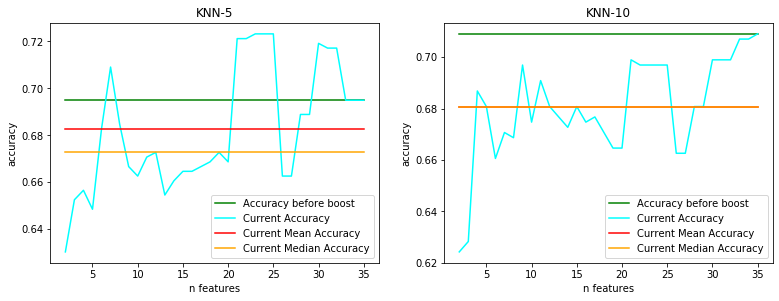

In [36]:
# draw the figure
fig = plt.figure(figsize=(20,15))

def accuracy_F(n_neighbors):
    """return the accuracy score without boost, 
    we record these data from Comparing Classification Algorithms(last part)"""
    if n_neighbors == 5:
        return accuracy_KNN5
    else:
        return accuracy_KNN10

def FE_run_model_ITP(model, alg_name, plot_index, n_neighbors):
    """accept model, name of algorithm, plot index and method we use to generate all the new features
    to draw a subplot which show the Accuracy before boost,Accuracy now and mean accuracy"""
    
    # store the accuracy for all the possible number of features we can choose 
    # and the number of feature we choose to achieve that accuracy
    n_list = []
    accuracy_list = []
    
    # loop through all the number of features we can choose
    for n in range(2,len(BestfeatureRank)):
        # append the number of features we will choose
        n_list.append(n)

        # select the features we want
        Bestfeature = BestfeatureRank[:n]
        # build the model on training data
        FE_X_train_now = FE_X_train[Bestfeature]
        model.fit(FE_X_train_now, FE_y_train.values.reshape(-1,))

        # make predictions for test data
        # make predictions for test data
        # generate the new feature first
        FE_X_test_now = FE_X_test[Bestfeature]
        FE_y_pred = model.predict(FE_X_test_now)
        # calculate the accuracy score
        accuracy =  accuracy_score(FE_y_test, FE_y_pred)
        accuracy_list.append(accuracy)
        
    ax = fig.add_subplot(3,3,plot_index)
    # draw the accuracy before boost
    ax.plot(n_list,[accuracy_F(n_neighbors) for i in accuracy_list],color='green',label = 'Accuracy before boost')
    # draw the current accuracy line and the current mean accuracy line 
    ax.plot(n_list,accuracy_list,color='aqua',label = 'Current Accuracy')
    ax.plot(n_list,[mean(accuracy_list) for i in accuracy_list],color='red',label = 'Current Mean Accuracy')
    ax.plot(n_list,[median(accuracy_list) for i in accuracy_list],color='orange',label = 'Current Median Accuracy')
    ax.legend()
    
    ax.set_xlabel("n features")
    ax.set_ylabel("accuracy")
    ax.set_title(alg_name)
    return n_list[accuracy_list.index(max(accuracy_list))],max(accuracy_list)
    

# draw the graph of KNN-5
model = neighbors.KNeighborsClassifier(n_neighbors=5)
best_KNN5 = FE_run_model_ITP(model, "KNN-5", 1, 5)

# draw the graph of KNN-10
model = neighbors.KNeighborsClassifier(n_neighbors=10)
best_KNN10 = FE_run_model_ITP(model, "KNN-10", 2, 10)

print('/**************************************************************/')
print('best accuracy for K-NN = 5:')
print(f'Number of features we select:   {best_KNN5[0]}')
print(f'Accuracy:                       {best_KNN5[1]}')
print('/**************************************************************/')
print('best accuracy for K-NN = 10:')
print(f'Number of features we select:   {best_KNN10[0]}')
print(f'Accuracy:                       {best_KNN10[1]}')
print('/**************************************************************/')
print('The mean line and median line coincide for KNN-10')

In [37]:
"""
Almost same as before, but we change '*' to '/' and combination to permutation and exclude f11 = f1 / f1
"""

"""
Interaction term pairs
method: f12 = f1 / f2
"""

# seperate the date into training parts and testing parts
FE_X_train, FE_X_test ,FE_y_train, FE_y_test= train_test_split(df_meanc.drop(columns='Class'), 
                                                   df_meanc.loc[:,['Class']], 
                                                   test_size=1/3, random_state = 42)

# feature we added
added_features = []
# add all the possible features to the X_train
for i in itertools.permutations(list(df_meanc.drop(columns='Class')),2):
        if i[0] != i[1]:
            FE_X_train[i] = FE_X_train[i[0]] / FE_X_train[i[1]] 
            FE_X_test[i] = FE_X_test[i[0]] / FE_X_test[i[1]] 
            added_features.append(i)
        

# rank the featureScores
featureScores = []
for attribute in FE_X_train:
    featureScores.append([attribute,mutual_info_score(FE_X_train[attribute],FE_y_train.Class)])
featureScores = sorted(featureScores,key=lambda x:x[1],reverse=True)
BestfeatureRank = [i[0] for i in featureScores]

/**************************************************************/
best accuracy for K-NN = 5:
Number of features we select:   25
Accuracy:                       0.7131313131313132
/**************************************************************/
best accuracy for K-NN = 10:
Number of features we select:   51
Accuracy:                       0.7131313131313132
/**************************************************************/


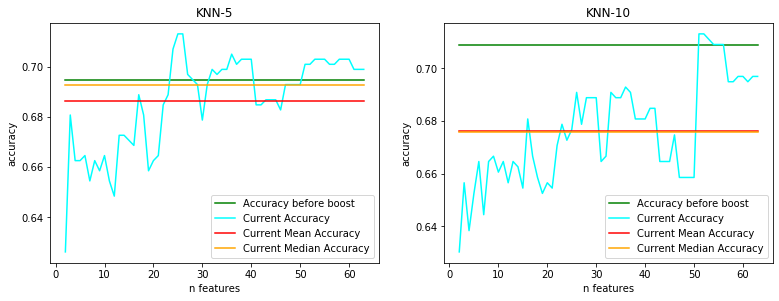

In [38]:
# draw the figure
fig = plt.figure(figsize=(20,15))

# draw the graph of KNN-5
model = neighbors.KNeighborsClassifier(n_neighbors=5)
best_KNN5 = FE_run_model_ITP(model, "KNN-5", 1, 5)

# draw the graph of KNN-10
model = neighbors.KNeighborsClassifier(n_neighbors=10)
best_KNN10 = FE_run_model_ITP(model, "KNN-10", 2, 10)

print('/**************************************************************/')
print('best accuracy for K-NN = 5:')
print(f'Number of features we select:   {best_KNN5[0]}')
print(f'Accuracy:                       {best_KNN5[1]}')
print('/**************************************************************/')
print('best accuracy for K-NN = 10:')
print(f'Number of features we select:   {best_KNN10[0]}')
print(f'Accuracy:                       {best_KNN10[1]}')
print('/**************************************************************/')

/**************************************************************/
best accuracy for K-NN = 5:
Number of clusters for KMeans: 2
Number of features we select:  5
Accuracy:                      0.7272727272727273
/**************************************************************/
best accuracy for K-NN = 10:
Number of clusters for KMeans: 8
Number of features we select:  7
Accuracy:                      0.7313131313131314
/**************************************************************/


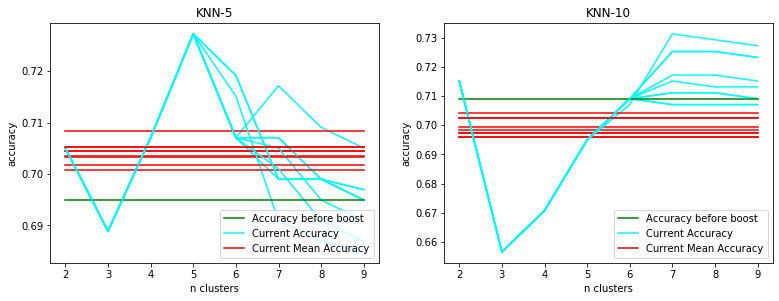

In [44]:
#seperate the data into train_set and test_set
FE_X_train, FE_X_test ,FE_y_train, FE_y_test= train_test_split(df_meanc.drop(columns='Class'), 
                                                   df_meanc.loc[:,['Class']],
                                                   test_size=1/3, random_state=42)

def KM_model(K):
    """accept the number of clusters and return the KMean"""
    km = KMeans(n_clusters=K)
    km.fit(FE_X_train)
    return km

#draw the figure
fig = plt.figure(figsize=(20,15))

def FE_run_model_KM(model, alg_name, plot_index, n_neighbors):
    #draw a subfigure
    ax = fig.add_subplot(3,3,plot_index)
    
    # store the max accuracy for each time we add a different feature
    # and the number of feature we choose to achieve that accuracy
    n_list_max = []
    accuracy_list_max = []
    
    #loop through 2-10 clusters in KMean to conclude all the possibles
    for K in range(2,10):
        
        # store the accuracy for all the possible number of features we can choose 
        # and the number of feature we choose to achieve that accuracy
        n_list = []
        accuracy_list = []
        
        # the data we use in this case
        FE_X_trainK = FE_X_train.copy()
        km = KM_model(K)
        FE_X_trainK['KMean'] = km.labels_
        
        # rank the featureScores
        featureScores = []
        for attribute in FE_X_trainK:
            featureScores.append([attribute,mutual_info_score(FE_X_trainK[attribute],FE_y_train.Class)])
        featureScores = sorted(featureScores,key=lambda x:x[1],reverse=True)
        BestfeatureRank = [i[0] for i in featureScores]

        # loop through all the number of features we can choose
        for n in range(2,len(BestfeatureRank)+1):
            n_list.append(n)
            # build the model on training data
            model.fit(FE_X_trainK[BestfeatureRank[:n]], FE_y_train.values.reshape(-1,))

            # make predictions for test data
            # add the Feature of  cluster label into test data
            Fclusterlabel = []
            for i in range(FE_X_test.shape[0]):
                min_distance = 100000000
                for j in range(K):
                    distance = euclidean_distances([FE_X_test.iloc[i],km.cluster_centers_[j]])[0][1]
                    if distance < min_distance:
                        min_distance = distance
                        label = j
                Fclusterlabel.append(label)
            
            # predict the data
            FE_X_test_now = FE_X_test.copy()
            FE_X_test_now['KMean'] = Fclusterlabel
            FE_X_test_now = FE_X_test_now[BestfeatureRank[:n]]
            FE_y_pred = model.predict(FE_X_test_now)
            
            # calculate the accuracy score
            accuracy =  accuracy_score(FE_y_test, FE_y_pred)
            accuracy_list.append(accuracy)
        
        # draw the current accuracy line
        ax.plot(n_list,accuracy_list,color='aqua')
        # draw the current mean accuracy line
        mean_a = mean(accuracy_list)
        mean_accuracy_list = [mean_a for i in accuracy_list]
        ax.plot(n_list,mean_accuracy_list,color='red')
        
        # store the max accuracy and the number of features we need to achieve that accuracy
        index = accuracy_list.index(max(accuracy_list))
        n_list_max.append(n_list[index])
        accuracy_list_max.append(accuracy_list[index])
        
    # draw the accuracy before boost
    ax.plot(n_list,[accuracy_F(n_neighbors) for i in accuracy_list],color='green',label = 'Accuracy before boost')
    # draw the last current accuracy line and the current mean accuracy line 
    # but add label this time so we only have one label for one kind of line
    ax.plot(n_list,accuracy_list,color='aqua',label = 'Current Accuracy')
    ax.plot(n_list,mean_accuracy_list,color='red',label = 'Current Mean Accuracy')
    
    ax.legend(loc="lower right")
    ax.set_xlabel("n clusters")
    ax.set_ylabel("accuracy")
    ax.set_title(alg_name)
    
    # return Number of clusters for KMeans,Number of features we select and Accuracy when we achieve the highest accuracy
    index = accuracy_list_max.index(max(accuracy_list_max))
    return index+2,n_list_max[index],accuracy_list_max[index]

# draw the graph of KNN-5
model = neighbors.KNeighborsClassifier(n_neighbors=5)
best_KNN5 = FE_run_model_KM(model, "KNN-5", 1, 5)

# draw the graph of KNN-10
model = neighbors.KNeighborsClassifier(n_neighbors=10)
best_KNN10 = FE_run_model_KM(model, "KNN-10", 2, 10)

print('/**************************************************************/')
print('best accuracy for K-NN = 5:')
print(f'Number of clusters for KMeans: {best_KNN5[0]}')
print(f'Number of features we select:  {best_KNN5[1]}')
print(f'Accuracy:                      {best_KNN5[2]}')
print('/**************************************************************/')
print('best accuracy for K-NN = 10:')
print(f'Number of clusters for KMeans: {best_KNN10[0]}')
print(f'Number of features we select:  {best_KNN10[1]}')
print(f'Accuracy:                      {best_KNN10[2]}')
print('/**************************************************************/')

# Which parameter values you selected and why. (1 mark)
For interaction term pais,there are two methods.

    For f12 = f1 * f2, we select the best 23 features and k-NN(k=5) to create the highest accuracy score at 0.7232323232323232. We choose it because it could create the highest accuracy among all the possible parameter values(for this specific random_state) for this method.

    For f12 = f1 / f2, we choose the best 25 features and k-NN(k=5) to create the highest accuracy score at 0.7131313131313132 or the best 51 features and k-NN(k=10) to reach the same accuracy score. Same reason as before.

For Clustering labels method:
    
    We use 8 clusters for kMeans, select the best 8 features and use k-NN(k=10) to create the highest accuracy score at  0.7313131313131314. Same reason as before.

# Whether feature selection+generation with interaction term pairs can deliver an accuracy boost, based on your evidence from part 1. (1 mark)
If only consider the best acuracy scores, there is a boost.

But it is too overfitting if we only consider the best accuracy scores.

From the graph in part 1, we could see all the current mean accuracy lines and current median accuracy lines are below the accuracy scores before we do the feature selection+generation with interaction term pairs. Therefore, we conclude that there is no accuracy boost for overall performance on feature selection+generation with interaction term pairs.

And we could also obtain that kNN-5 is better than kNN-10 in these cases.

# Whether feature generation with clustering labels can deliver an accuracy boost, based on your evidence from part 2. (1 mark)
Yes, it can, but depends.

From the graph in part 2, it is easy to observe that for k-NN(k=5), all the Current Mean Accuracy(red line) is higher than accuracy before feature selection+generation(green line).And there is a peak of accuracy when we select 6 features and accuracy decreaces dramatically right after. But it still indicates that if we select 6 features for this methods, there should be a boost.

For k-NN(k=10), it is hard to say whether it can deliver an accuracy boost because if n>6, the accuracy is higher than accuracy before feature selection+generation for most cases. But if we use the current mean line, the answer for k-NN(k=10) is no.

# Another comprehension for Interaction term pairs. Given a pair of features f1 and f2, create a new feature f12 = f1 × f2 or by f12 = f1 ÷ f2. All possible pairs can be considered.

Here we only add one new feature at a time and all possible pairs can be considered.

In [40]:
"""
Interaction term pairs
method: f12 = f1 × f2
"""

# seperate the date into training parts and testing parts
FE_X_train, FE_X_test ,FE_y_train, FE_y_test= train_test_split(df_meanc.drop(columns='Class'), 
                                                   df_meanc.loc[:,['Class']], 
                                                   test_size=1/3, random_state = 42)

# feature we added
added_features = []
# add all the possible features to the X_train
for i in itertools.combinations(list(FE_X_train),2):
    FE_X_train[i] = FE_X_train[i[0]] * FE_X_train[i[1]] 
    added_features.append(i)

/**************************************************************/
best accuracy for K-NN = 5:
Features to create new feature: ('mcg', 'mit')
Number of features we select:   6
Accuracy:                       0.7313131313131314
/**************************************************************/
best accuracy for K-NN = 10:
Features to create new feature: ('gvh', 'erl')
Number of features we select:   3
Accuracy:                       0.7191919191919192
/**************************************************************/


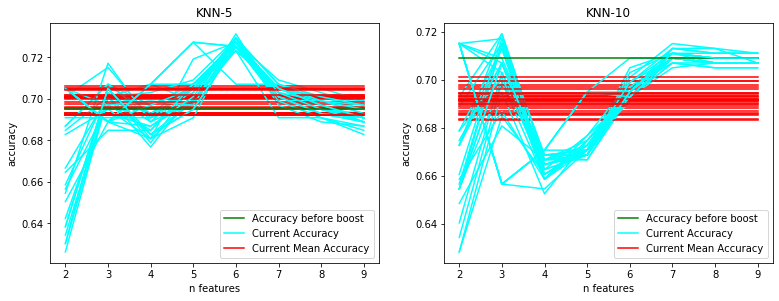

In [41]:
# draw the figure
fig = plt.figure(figsize=(20,15))

def accuracy_F(n_neighbors):
    """return the accuracy score without boost, 
    we record these data from Comparing Classification Algorithms(last part)"""
    if n_neighbors == 5:
        return accuracy_KNN5
    else:
        return accuracy_KNN10

def FE_run_model_ITP(model, alg_name, plot_index,n_neighbors, method):
    """accept model, name of algorithm, plot index and method we use to generate a new feature
    to draw a subplot which show the Accuracy before boost,Accuracy now and mean accuracy"""
    # store the max accuracy for each time we add a different feature
    # and the number of feature we choose to achieve that accuracy
    n_list_max = []
    accuracy_list_max = []
    
    # draw a subplot here
    ax = fig.add_subplot(3,3,plot_index)
    # loop through all the features to simulate that we generate all the possible pairs
    for added_feature in added_features:
        
        # rank the featureScores
        featureScores = []
        for attribute in df_meanc.drop(columns='Class'):
            featureScores.append([attribute,mutual_info_score(FE_X_train[attribute],FE_y_train['Class'])])
        featureScores.append([added_feature,mutual_info_score(FE_X_train[added_feature],FE_y_train['Class'])])
        featureScores = sorted(featureScores,key=lambda x:x[1],reverse=True)
        BestfeatureRank = [i[0] for i in featureScores]
        
        # store the accuracy for all the possible number of features we can choose 
        # and the number of feature we choose to achieve that accuracy
        n_list = []
        accuracy_list = []
        
        # loop through all the number of features we can choose
        for n in range(2,10):
            
            n_list.append(n)
            # feature we choose
            Bestfeature = BestfeatureRank[:n]

            # build the model on training data
            model.fit(FE_X_train[Bestfeature], FE_y_train.values.reshape(-1,))

            # make predictions for test data
            # generate the new feature first
            FE_X_test_now = FE_X_test.copy()
            if (method == '*'):
                FE_X_test_now[added_feature] = FE_X_test_now[added_feature[0]] * FE_X_test_now[added_feature[1]] 
            elif(method == '/'):
                FE_X_test_now[added_feature] = FE_X_test_now[added_feature[0]] / FE_X_test_now[added_feature[1]] 
            FE_X_test_now = FE_X_test_now[Bestfeature]
            FE_y_pred = model.predict(FE_X_test_now)
            # calculate the accuracy score
            accuracy =  accuracy_score(FE_y_test, FE_y_pred)
            accuracy_list.append(accuracy)
        
        # draw the current accuracy line
        ax.plot(n_list,accuracy_list,color='aqua')
        # draw the current mean accuracy line
        ax.plot(n_list,[mean(accuracy_list) for i in accuracy_list],color='red')
        
        # store the max accuracy and the number of features we need to achieve that accuracy
        max_accuracy_now = max(accuracy_list)
        n_list_max.append(n_list[accuracy_list.index(max_accuracy_now)])
        accuracy_list_max.append(max_accuracy_now)
    
    # draw the accuracy before boost
    ax.plot(n_list,[accuracy_F(n_neighbors) for i in accuracy_list],color='green',label = 'Accuracy before boost')
    # draw the last current accuracy line and the current mean accuracy line 
    # but add label this time so we only have one label for one kind of line
    ax.plot(n_list,accuracy_list,color='aqua',label = 'Current Accuracy')
    ax.plot(n_list,[mean(accuracy_list) for i in accuracy_list],color='red',label = 'Current Mean Accuracy')
    ax.legend(loc="lower right")
    ax.set_xlabel("n features")
    ax.set_ylabel("accuracy")
    ax.set_title(alg_name)
    
    # return Features to create new feature,Number of features we select and Accuracy when we achieve the highest accuracy
    index = accuracy_list_max.index(max(accuracy_list_max))
    return added_features[index],n_list_max[index],max(accuracy_list_max)

# draw the graph of KNN-5
model = neighbors.KNeighborsClassifier(n_neighbors=5)
best_KNN5 = FE_run_model_ITP(model, "KNN-5", 1, 5, '*')

# draw the graph of KNN-10
model = neighbors.KNeighborsClassifier(n_neighbors=10)
best_KNN10 = FE_run_model_ITP(model, "KNN-10", 2, 10 , '*')

print('/**************************************************************/')
print('best accuracy for K-NN = 5:')
print(f'Features to create new feature: {best_KNN5[0]}')
print(f'Number of features we select:   {best_KNN5[1]}')
print(f'Accuracy:                       {best_KNN5[2]}')
print('/**************************************************************/')
print('best accuracy for K-NN = 10:')
print(f'Features to create new feature: {best_KNN10[0]}')
print(f'Number of features we select:   {best_KNN10[1]}')
print(f'Accuracy:                       {best_KNN10[2]}')
print('/**************************************************************/')

In [42]:
"""
Almost same as before, but we change '*' to '/' and combination to permutation and exclude f11 = f1 / f1
"""

"""
Interaction term pairs
method: f12 = f1 / f2
"""

# seperate the date into training parts and testing parts
FE_X_train, FE_X_test ,FE_y_train, FE_y_test= train_test_split(df_meanc.drop(columns='Class'), 
                                                   df_meanc.loc[:,['Class']], 
                                                   test_size=1/3, random_state=42)

# feature we added
added_features = []
# add all the possible features to the X_train
# use permutation and a if to avoid self-combination
for i in itertools.permutations(list(FE_X_train),2):
    if i[0] != i[1]:
        FE_X_train[i] = FE_X_train[i[0]] / FE_X_train[i[1]] 
        added_features.append(i)

/**************************************************************/
best accuracy for K-NN = 5:
Features to create new feature: ('erl', 'pox')
Number of features we select:   5
Accuracy:                       0.7272727272727273
/**************************************************************/
best accuracy for K-NN = 10:
Features to create new feature: ('erl', 'alm')
Number of features we select:   6
Accuracy:                       0.7313131313131314
/**************************************************************/


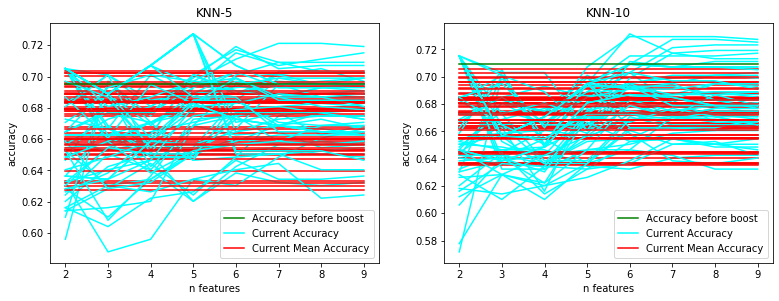

In [43]:
# draw the figure
fig = plt.figure(figsize=(20,15))

# draw the graph of KNN-5
model = neighbors.KNeighborsClassifier(n_neighbors=5)
best_KNN5 = FE_run_model_ITP(model, "KNN-5", 1, 5, '/')

# draw the graph of KNN-10
model = neighbors.KNeighborsClassifier(n_neighbors=10)
best_KNN10 = FE_run_model_ITP(model, "KNN-10", 2, 10, '/')

print('/**************************************************************/')
print('best accuracy for K-NN = 5:')
print(f'Features to create new feature: {best_KNN5[0]}')
print(f'Number of features we select:   {best_KNN5[1]}')
print(f'Accuracy:                       {best_KNN5[2]}')
print('/**************************************************************/')
print('best accuracy for K-NN = 10:')
print(f'Features to create new feature: {best_KNN10[0]}')
print(f'Number of features we select:   {best_KNN10[1]}')
print(f'Accuracy:                       {best_KNN10[2]}')
print('/**************************************************************/')

# Which parameter values you selected and why. (1 mark)
For interaction term pais,there are two methods.

    For f12 = f1 * f2, we select features 'mcg'and 'mit' to make a new feature,the best 6 features and k-NN(k=5) to create the highest accuracy score at 0.7313131313131314. We choose it because it could create the highest accuracy among all the possible parameter values(for this specific random_state) for this method.

    For f12 = f1 / f2, we choose features 'erl'and 'alm' to make a new feature ,the best 6 features and k-NN(k=10) to create the highest accuracy score at 0.7313131313131314. Same reason as before.# 

# Whether feature selection+generation with interaction term pairs can deliver an accuracy boost, based on your evidence from part 1. (1 mark)
Yes, it can, but depends.

From the graph in part 1, we could say that if we use f12 = f1 * f2, and k-NN(k=5), there is a marginal accuracy boost. We obtain this because most of the Current Mean Accuracy(red line) is higher than accuracy before feature selection+generation(green line). And a peak occurs when we select 5 features. So if we only choose 5 best features, there should be a boost.

But for other methods, there is no boost. It is true that the highest accuracy is higher than the accuracy before feature selection+generation. However, most of the Current Mean Accuracy is lower than the accuracy before boost which means the highest accuracy is very unique, especially for the method that f12 = f1 / f2. For that method, the graph is noisy which means this method is not stable and useful.